## pandas.concat()
- 중요점 : 같은 컬럼끼리 수직으로 붙임





In [ ]:
import pandas as pd
df_BRAZIL = pd.read_csv("BRAZIL.csv")
df_ITALY = pd.read_csv("ITALY.csv")
df_USA = pd.read_csv("USA.csv")
df_BRAZIL.shape, df_ITALY.shape, df_USA.shape

((10683, 9), (37986, 9), (179365, 9))

In [ ]:
df_merged = pd.concat(objs=[df_BRAZIL, df_ITALY, df_USA])
df_merged.shape

(228034, 9)

In [ ]:
df_merged

,Date,Country,City,Specie,count,min,max,median,variance
0,14-03-2021,BRAZIL,São José dos Campos,humidity,96,48.0,100.0,88.0,2415.31
1,05-07-2021,BRAZIL,São José dos Campos,humidity,96,49.0,100.0,76.0,2248.35
2,28-09-2021,BRAZIL,São José dos Campos,humidity,96,23.0,93.0,53.0,5136.40
3,16-11-2021,BRAZIL,São José dos Campos,humidity,96,26.0,88.0,68.0,4897.40
4,22-06-2021,BRAZIL,São José dos Campos,humidity,96,82.0,100.0,93.0,357.04
...,...,...,...,...,...,...,...,...,...
179360,05-02-2021,UNITED STATES,Fort Worth,wind-speed,23,0.4,7.8,5.1,44.98
179361,06-05-2021,UNITED STATES,Fort Worth,wind-speed,22,1.4,6.0,2.8,19.19
179362,29-05-2021,UNITED STATES,Fort Worth,wind-speed,22,3.2,6.9,5.8,12.27
179363,30-07-2021,UNITED STATES,Fort Worth,wind-speed,22,0.3,7.5,2.7,53.93


## 각 나라의 주요도시 3개씩 확인

In [ ]:
top_3_cities_per_country = df_merged.groupby('Country')['City'].value_counts().groupby(level=0).nlargest(3)
top_3_cities_per_country

Country        Country        City               
BRAZIL         BRAZIL         São Paulo              3831
                              Vitória                3582
                              São José dos Campos    3270
Italy          Italy          Naples                 3838
                              Milan                  3829
                              Brescia                3503
UNITED STATES  UNITED STATES  Dallas                 4176
                              Houston                3838
                              Milwaukee              3769
Name: City, dtype: int64

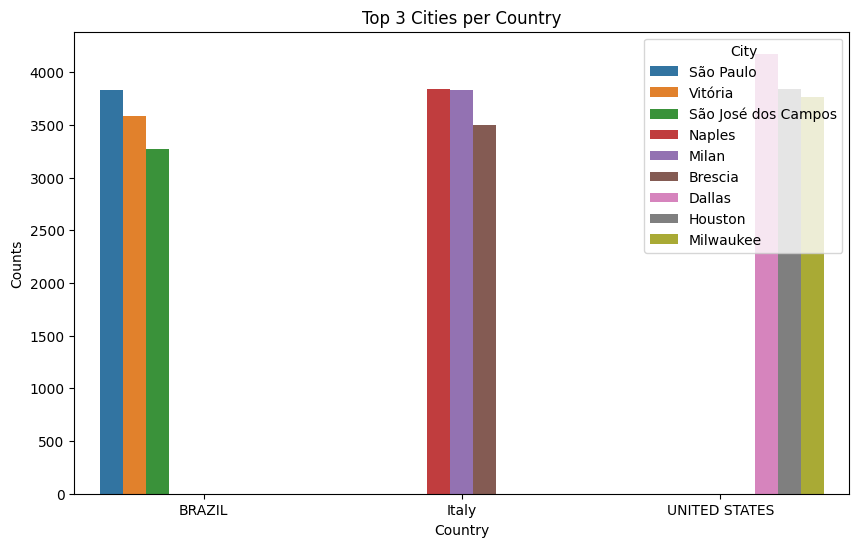

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_list = top_3_cities_per_country.tolist()

index_list = top_3_cities_per_country.index.tolist()

country_list = [x[0] for x in index_list]
city_list = [x[2] for x in index_list]

df_top_3_cities = pd.DataFrame({'Country': country_list, 'City': city_list, 'Counts': data_list})

plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Counts', hue='City', data=df_top_3_cities)
plt.title('Top 3 Cities per Country')
plt.show()
